In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [2]:
# Load the dataset
df = pd.read_csv('smart_grid_stability_augmented.csv')

# Drop the 'stab' column, keep axis=1. Save in variable STAB.
STAB = df.drop('stab', axis=1)


### 1. Seperate the STAB dataset to train and test, stabf is y, the others are x, make test dataset 30% of the total dataset (10) ###

In [3]:
# y is the column 'stabf', X is STAB with 'stabf' dropped
X = STAB.drop('stabf', axis=1)
y = STAB['stabf']

# Split the data (30% test set, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 2. Apply Random Forest to this dataset, predict stabf, show the accuracy. (10) ###

In [4]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.9450555555555555


### 3. Apply SVM to this dataset, predict stabf, show the accuracy. (10)

In [5]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm)


SVM Accuracy: 0.9272222222222222


###  4. Standardize and Normalize the data. Use the first 2000 observations only. Then use PCA to reduce to 2 dimensions. Then plot the reduced data (10)

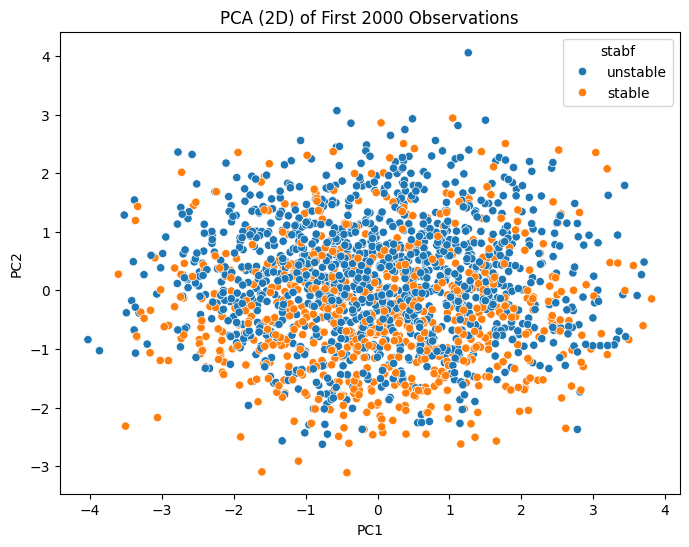

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Use first 2000 observations
X_2000 = X.iloc[:2000]
y_2000 = y.iloc[:2000]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2000)

# PCA to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_2000)
plt.title('PCA (2D) of First 2000 Observations')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


### 5a. Apply K-means on the dataset. Determine optimal number of clusters using silhouette score (10)

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

optimal_k = np.argmax(silhouette_scores) + 2
print("Optimal number of clusters (KMeans):", optimal_k)


K=2, Silhouette Score=0.102
K=3, Silhouette Score=0.074
K=4, Silhouette Score=0.065
K=5, Silhouette Score=0.064
K=6, Silhouette Score=0.066
K=7, Silhouette Score=0.066
K=8, Silhouette Score=0.067
K=9, Silhouette Score=0.066
K=10, Silhouette Score=0.068
Optimal number of clusters (KMeans): 2


### 5b. Apply Agglomerative Clustering on the dataset. Determine optimal number of clusters using silhouette score (10)

In [12]:
silhouette_scores_agg = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores_agg.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")

optimal_k_agg = np.argmax(silhouette_scores_agg) + 2
print("Optimal number of clusters (Agglomerative):", optimal_k_agg)


K=2, Silhouette Score=0.063
K=3, Silhouette Score=0.039
K=4, Silhouette Score=0.028
K=5, Silhouette Score=0.026
K=6, Silhouette Score=0.027
K=7, Silhouette Score=0.026
K=8, Silhouette Score=0.021
K=9, Silhouette Score=0.020
K=10, Silhouette Score=0.021
Optimal number of clusters (Agglomerative): 2


### 5c. Compare the two methods. Explain any differences you can see (10)

Both K-Means and Agglomerative Clustering have the 2 as the optimal number of clusers, although K-means have a higher silhouette score of 0.102. They both use the silhouette score to determine the optimal number of clusters. K-Means is faster and works well for spherical clusters, while Agglomerative Clustering can capture more complex shapes but is slower. Additionally, they have different algorithms to define and merge clusters (centroid-based vs. linkage-based).

### 6. Load a new "Wine" dataset. ###

In [9]:
wine = pd.read_csv('Wine.csv')
print(wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [10]:
from sklearn.cluster import DBSCAN

# Use Malic_Acid and Customer_Segment
X_wine = wine[['Malic_Acid', 'Customer_Segment']]

# Standardize
X_wine_scaled = StandardScaler().fit_transform(X_wine)

# DBSCAN with eps=0.5
dbscan1 = DBSCAN(eps=0.5, min_samples=2)
labels1 = dbscan1.fit_predict(X_wine_scaled)
print("DBSCAN (eps=0.5):", np.unique(labels1, return_counts=True))

# DBSCAN with eps=0.2
dbscan2 = DBSCAN(eps=0.2, min_samples=2)
labels2 = dbscan2.fit_predict(X_wine_scaled)
print("DBSCAN (eps=0.2):", np.unique(labels2, return_counts=True))


DBSCAN (eps=0.5): (array([-1,  0,  1,  2]), array([ 1, 59, 70, 48]))
DBSCAN (eps=0.2): (array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([ 4, 51,  6, 54,  7,  3,  2,  3,  3, 34,  3,  2,  3,  3]))


### 7. Create a Model using DBSCANS (10). Use variables Malic_Acid and Customer_segment. Compare results for eps=0.5 and eps=0.2 for min_samples=2

In [14]:
from sklearn.cluster import DBSCAN

# Use Malic_Acid and Customer_Segment
X_wine = wine[['Malic_Acid', 'Customer_Segment']]

# Standardize
X_wine_scaled = StandardScaler().fit_transform(X_wine)

# DBSCAN with eps=0.5
dbscan1 = DBSCAN(eps=0.5, min_samples=2)
labels1 = dbscan1.fit_predict(X_wine_scaled)
dbscan1_score = silhouette_score(X_wine_scaled, labels1)
print("DBSCAN (eps=0.5):", dbscan1_score)

# DBSCAN with eps=0.2
dbscan2 = DBSCAN(eps=0.2, min_samples=2)
labels2 = dbscan2.fit_predict(X_wine_scaled)
dbscan2_score = silhouette_score(X_wine_scaled, labels2)
print("DBSCAN (eps=0.2):", dbscan2_score)


DBSCAN (eps=0.5): 0.49034845823657547
DBSCAN (eps=0.2): 0.592176058238535


DBScan with epsilon 0.2 has a higher score of 0.59

### 8. Explain the different techniques used in this lab. What are their uses and under which conditions are they used?(20)

Random Forest: An ensemble supervised learning method, good for classification and regression, robust to overfitting, works well with mixed data types.

SVM: Supervised, finds the optimal hyperplane for classification, effective in high-dimensional spaces.

Standardization/Normalization: Preprocessing steps to scale features for better model performance.

PCA: Unsupervised dimensionality reduction, helps with visualization and speeding up algorithms.

K-Means: Unsupervised, partitions data into k clusters, works best with spherical clusters.

Agglomerative Clustering: Hierarchical, builds nested clusters, good for exploratory analysis.

DBSCAN: Density-based, finds arbitrarily shaped clusters, robust to outliers, no need to specify number of clusters.